In [16]:
# Imports

import cPickle
import os.path
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import stats



In [2]:
# get the data from the pickle into a dataframe


#load utilization summary data into a dataframe
pkl = open(os.path.join('..', 'data', 'LibData.pkl'),'rb')
utilization = cPickle.load(pkl)
pkl.close()


In [3]:
utilization.axes


[DatetimeIndex(['2010-03-24 12:00:00', '2010-03-24 13:00:00',
                '2010-03-24 14:00:00', '2010-03-24 15:00:00',
                '2010-03-24 16:00:00', '2010-03-24 17:00:00',
                '2010-03-24 18:00:00', '2010-03-24 19:00:00',
                '2010-03-24 20:00:00', '2010-03-24 21:00:00',
                ...
                '2017-10-18 23:00:00', '2017-10-19 00:00:00',
                '2017-10-19 01:00:00', '2017-10-19 02:00:00',
                '2017-10-19 03:00:00', '2017-10-19 04:00:00',
                '2017-10-19 05:00:00', '2017-10-19 06:00:00',
                '2017-10-19 07:00:00', '2017-10-19 08:00:00'],
               dtype='datetime64[ns]', length=66381, freq='H'),
 Index([u'BL001', u'BL002', u'CITI001', u'CITI002', u'CITI003', u'CITI004',
        u'CITI005', u'CITI006', u'CITI007', u'CITI008',
        ...
        u'TL5002', u'TL6001', u'TL6002', u'TL7001', u'TL702', u'TL801',
        u'TL802', u'TL90003', u'TL901', u'TL902'],
       dtype='object', lengt

In [4]:
utilization.head()


,BL001,BL002,CITI001,CITI002,CITI003,CITI004,CITI005,CITI006,CITI007,CITI008,...,TL5002,TL6001,TL6002,TL7001,TL702,TL801,TL802,TL90003,TL901,TL902
2010-03-24 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-24 13:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-24 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-24 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-24 16:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
### The utilization data is stored as a percentage of any given hour in use. So if an entry lists 0.68, that means the computer was in use for 68% of a given hour. 

### Note:  Some of these computers did not exist in 2010. They have a default use of 0.0 until they were put into place, which varies from computer to computer. 

In [6]:
# get the divisions of each semester as a series

Spr2010 = pd.Timestamp('2010-01-01 00:00:00')
Fall2010 = pd.Timestamp('2010-07-01 00:00:00')

Spr2011 = pd.Timestamp('2011-01-01 00:00:00')
Fall2011 = pd.Timestamp('2011-07-01 00:00:00')

Spr2012 = pd.Timestamp('2012-01-01 00:00:00')
Fall2012 = pd.Timestamp('2012-07-01 00:00:00')

Spr2013 = pd.Timestamp('2013-01-01 00:00:00')
Fall2013 = pd.Timestamp('2013-07-01 00:00:00')

Spr2014 = pd.Timestamp('2014-01-01 00:00:00')
Fall2014 = pd.Timestamp('2014-07-01 00:00:00')

Spr2015 = pd.Timestamp('2015-01-01 00:00:00')
Fall2015 = pd.Timestamp('2015-07-01 00:00:00')

Spr2016 = pd.Timestamp('2016-01-01 00:00:00')
Fall2016 = pd.Timestamp('2016-07-01 00:00:00')

Spr2017 = pd.Timestamp('2017-01-01 00:00:00')
Fall2017 = pd.Timestamp('2017-07-01 00:00:00')

Spr2018 = pd.Timestamp('2018-01-01 00:00:00')

spring2010 = utilization.truncate(before = Spr2010, after = Fall2010)
fall2010 = utilization.truncate(before = Fall2010, after = Spr2011)

spring2011 = utilization.truncate(before = Spr2011, after = Fall2011)
fall2011 = utilization.truncate(before = Fall2011, after = Spr2012)

spring2012 = utilization.truncate(before = Spr2012, after = Fall2012)
fall2012 = utilization.truncate(before = Fall2012, after = Spr2013)

spring2013 = utilization.truncate(before = Spr2013, after = Fall2013)
fall2013 = utilization.truncate(before = Fall2013, after = Spr2014)

spring2014 = utilization.truncate(before = Spr2014, after = Fall2014)
fall2014 = utilization.truncate(before = Fall2014, after = Spr2015)

spring2015 = utilization.truncate(before = Spr2015, after = Fall2015)
fall2015 = utilization.truncate(before = Fall2015, after = Spr2016)

spring2016 = utilization.truncate(before = Spr2016, after = Fall2016)
fall2016 = utilization.truncate(before = Fall2016, after = Spr2017)

spring2017 = utilization.truncate(before = Spr2017, after = Fall2017)
fall2017 = utilization.truncate(before = Fall2017, after = Spr2018)

In [7]:
# Now find the mean of each and put them into a dataframe for easier viewing
s10 = spring2010.mean(axis = 0)
f10 = fall2010.mean(axis = 0)
s11 = spring2011.mean(axis = 0)
f11 = fall2011.mean(axis = 0)
s12 = spring2012.mean(axis = 0)
f12 = fall2012.mean(axis = 0)
s13 = spring2013.mean(axis = 0)
f13 = fall2013.mean(axis = 0)
s14 = spring2014.mean(axis = 0)
f14 = fall2014.mean(axis = 0)
s15 = spring2015.mean(axis = 0)
f15 = fall2015.mean(axis = 0)
s16 = spring2016.mean(axis = 0)
f16 = fall2016.mean(axis = 0)
s17 = spring2017.mean(axis = 0)
f17 = fall2017.mean(axis =0)

SemesterMeans = pd.DataFrame({'s10': s10, 'f10': f10,
                              's11': s11, 'f11': f11,
                              's12': s12, 'f12': f12,
                              's13': s13, 'f13': f13,
                              's14': s14, 'f14': f14,
                              's15': s15, 'f15': f15,
                              's16': s16, 'f16': f16,
                              's17': s17,'f17': f17})

SemesterMeans.head()

,f10,f11,f12,f13,f14,f15,f16,f17,s10,s11,s12,s13,s14,s15,s16,s17
BL001,0.0,0.0,0.080241,0.100292,0.114062,0.056746,0.359840,0.033467,0.0,0.0,0.0,0.118572,0.075770,0.087503,0.044504,0.043709
BL002,0.0,0.0,0.086039,0.264280,0.148497,0.074740,0.072940,0.043494,0.0,0.0,0.0,0.439313,0.106592,0.102480,0.071121,0.092427
CITI001,0.0,0.0,0.108386,0.083795,0.119027,0.077823,0.117084,0.049552,0.0,0.0,0.0,0.072481,0.089303,0.072430,0.053626,0.051997
CITI002,0.0,0.0,0.052765,0.063793,0.063420,0.086006,0.246369,0.042365,0.0,0.0,0.0,0.050753,0.063333,0.057583,0.065337,0.046405
CITI003,0.0,0.0,0.070506,0.074965,0.054471,0.056041,0.241809,0.039901,0.0,0.0,0.0,0.047472,0.040496,0.056037,0.054258,0.037921


In [8]:
# Now do the same thing with the medians
s10 = spring2010.median(axis = 0)
f10 = fall2010.median(axis = 0)
s11 = spring2011.median(axis = 0)
f11 = fall2011.median(axis = 0)
s12 = spring2012.median(axis = 0)
f12 = fall2012.median(axis = 0)
s13 = spring2013.median(axis = 0)
f13 = fall2013.median(axis = 0)
s14 = spring2014.median(axis = 0)
f14 = fall2014.median(axis = 0)
s15 = spring2015.median(axis = 0)
f15 = fall2015.median(axis = 0)
s16 = spring2016.median(axis = 0)
f16 = fall2016.median(axis = 0)
s17 = spring2017.median(axis = 0)
f17 = fall2017.median(axis =0)

SemesterMedians = pd.DataFrame({'s10': s10, 'f10': f10,
                              's11': s11, 'f11': f11,
                              's12': s12, 'f12': f12,
                              's13': s13, 'f13': f13,
                              's14': s14, 'f14': f14,
                              's15': s15, 'f15': f15,
                              's16': s16, 'f16': f16,
                              's17': s17,'f17': f17})

SemesterMedians.head()


,f10,f11,f12,f13,f14,f15,f16,f17,s10,s11,s12,s13,s14,s15,s16,s17
BL001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BL002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CITI001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CITI002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CITI003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Here follows the accounts of all 15 semesters after Spring 2010

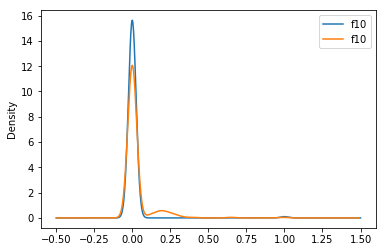

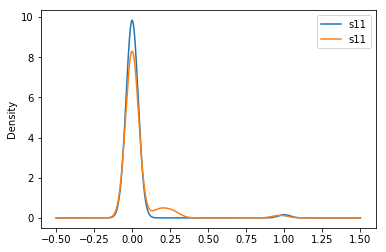

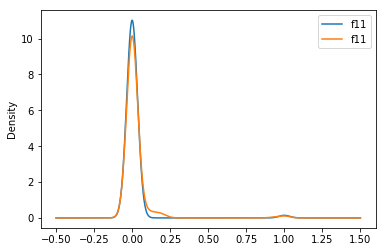

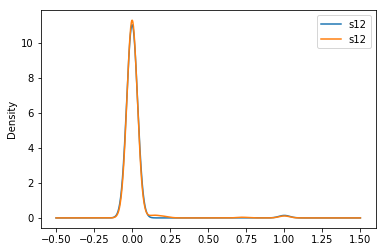

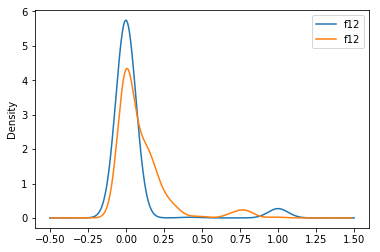

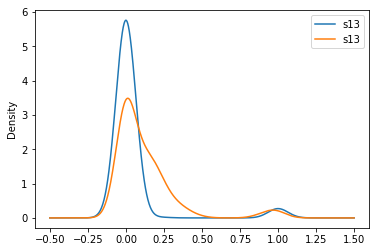

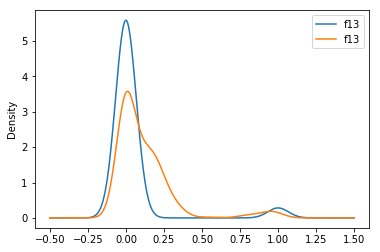

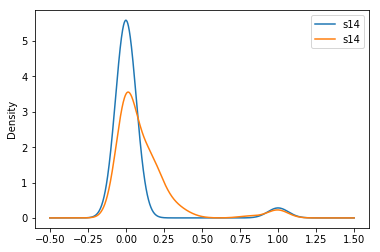

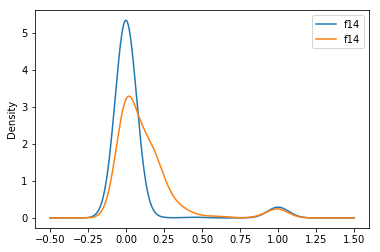

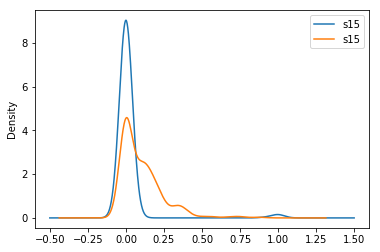

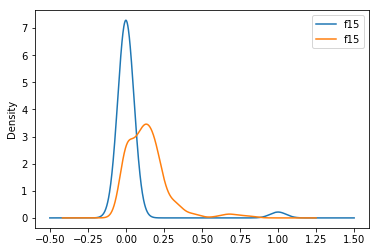

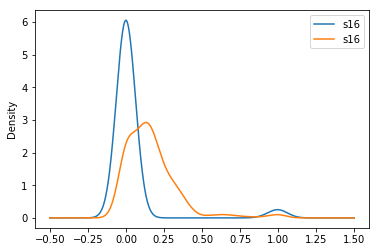

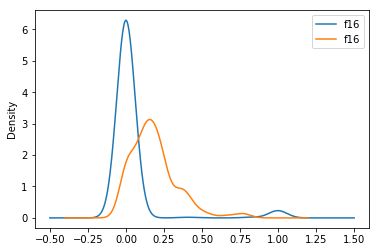

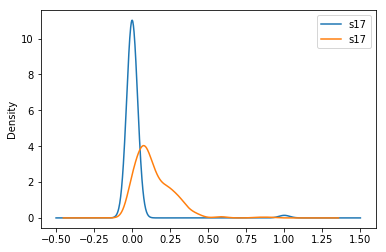

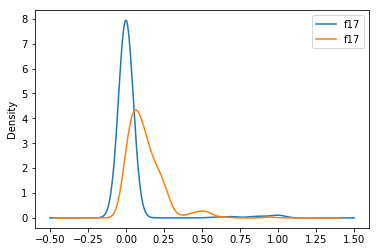

In [10]:
SemesterMedians.f10.plot(kind = "kde", legend = "True")
SemesterMeans.f10.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.s11.plot(kind = "kde", legend = "True")
SemesterMeans.s11.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.f11.plot(kind = "kde", legend = "True")
SemesterMeans.f11.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.s12.plot(kind = "kde", legend = "True")
SemesterMeans.s12.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.f12.plot(kind = "kde", legend = "True")
SemesterMeans.f12.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.s13.plot(kind = "kde", legend = "True")
SemesterMeans.s13.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.f13.plot(kind = "kde", legend = "True")
SemesterMeans.f13.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.s14.plot(kind = "kde", legend = "True")
SemesterMeans.s14.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.f14.plot(kind = "kde", legend = "True")
SemesterMeans.f14.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.s15.plot(kind = "kde", legend = "True")
SemesterMeans.s15.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.f15.plot(kind = "kde", legend = "True")
SemesterMeans.f15.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.s16.plot(kind = "kde", legend = "True")
SemesterMeans.s16.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.f16.plot(kind = "kde", legend = "True")
SemesterMeans.f16.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.s17.plot(kind = "kde", legend = "True")
SemesterMeans.s17.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

SemesterMedians.f17.plot(kind = "kde", legend = "True")
SemesterMeans.f17.plot(kind = "kde", secondary_y = "True", legend = "True")
plt.show()

## Null Hypothsis: Computers with >1 monitor have the same average usage percentages as those with 1 or less since Spring 2016. We'll use a 5% confidence to reject (p-value <= |0.05|)

* ** We'll run this test on all semesters since spring 2016 since that is when most of the dual monitors seem to have been added. 

In [11]:
# Get the attributes 
attributes = pd.read_csv(os.path.join('..', 'data', 'computerAttributes.csv'))
attributes.index = attributes['computerName']

#Keep only the machines that require a logon
machinesOfInterest = [x for x in attributes.index
                        if attributes.loc[x]['requiresLogon']== True]


In [12]:
# Assemble usage stats
s16Util = SemesterMeans.s16[machinesOfInterest]
s17Util = SemesterMeans.s17[machinesOfInterest]
f16Util = SemesterMeans.f16[machinesOfInterest]
f17Util = SemesterMeans.f17[machinesOfInterest]



In [14]:
# Split into dual monitors and Single monitors
spr16DualUsage = s16Util[[x for x in machinesOfInterest
                         if attributes.loc[x]['numMonitors']>1]]

spr16SingUsage = s16Util[[x for x in machinesOfInterest
                         if attributes.loc[x]['numMonitors']==1]]


spr17DualUsage = s17Util[[x for x in machinesOfInterest
                         if attributes.loc[x]['numMonitors']>1]]
spr17SingUsage = s17Util[[x for x in machinesOfInterest
                         if attributes.loc[x]['numMonitors']==1]]

f16DualUsage = f16Util[[x for x in machinesOfInterest
                         if attributes.loc[x]['numMonitors']>1]]
f16SingUsage = f16Util[[x for x in machinesOfInterest
                         if attributes.loc[x]['numMonitors']==1]]

f17DualUsage = f17Util[[x for x in machinesOfInterest
                         if attributes.loc[x]['numMonitors']>1]]
f17SingUsage = f17Util[[x for x in machinesOfInterest
                        if attributes.loc[x]['numMonitors']==1]]

In [26]:
s16Results = stats.ttest_ind(spr16DualUsage, spr16SingUsage)
s17Results = stats.ttest_ind(spr17DualUsage, spr17SingUsage)
f16Results = stats.ttest_ind(f16DualUsage, f17SingUsage)
f17Results = stats.ttest_ind(f17DualUsage, f17SingUsage)


print ("Spring16: ")
print s16Results
print("\n Spring17:")
print s17Results
print("\nFall16: ")
print f16Results
print("\nFall17: ")
print f17Results


Spring16 pvalue: 
Ttest_indResult(statistic=2.0766947104500439, pvalue=0.038738410483323521)

 Spring17 pvalue:
Ttest_indResult(statistic=5.0033608030267382, pvalue=9.9473296541892113e-07)

Fall16 pvalue: 
Ttest_indResult(statistic=5.4081077706611049, pvalue=1.363128998481794e-07)

Fall17 pvalue: 
Ttest_indResult(statistic=2.5600373693375338, pvalue=0.010989362194974371)


# We can reject the null hypothesis for all semesters! Each of these p-values are less than 0.05. Thus we know that the computers with dual monitors are NOT used the same way. In fact, they are used more.